In [3]:
format compact

# Föreläsning 2
### Matlab Programmering, en introduktion

Syntax
- Funktioner
- Funktionsanrop

- Argument

- Resultat värden
- Multipla resultat

Koncept
- Nestade funktioner: Funktioner som anropar funktioner
- Rekursiva funktioner: Funktion som anropar sig själv

Exempel
- Algoritmer
  - Fibonacci
  - Sortering
  - Bisection
  - Fraktaler, Barnsley fern?

# Funktioner

I Matlab

- I MATLAB måste varje funktion definieras i en separat fil
- Filen måste ha samman namn som funktionen och ha filändelse `.m`,
  t.ex. `my_function.m`

In [1]:
%%file my_function.m

function my_function()
    disp('Hi from my_function!')
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/my_function.m'.


In [4]:
my_function()

Hi from my_function!


# Funktions-argument

- Skicka variabler som input till en funktion

In [5]:
%%file my_function_with_arguments.m

function my_function_with_arguments(name, index, number)
    disp("Hi from my_function_with_arguments")
    disp("name = " + name)
    disp("index = " + num2str(index))
    disp("number = " + num2str(number))
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/my_function_with_arguments.m'.


In [6]:
my_function_with_arguments("Ada", 42, 13.37)

Hi from my_function_with_arguments
name = Ada
index = 42
number = 13.37


# Funktions-resultat (return values)

En funktion kan också returnera resultat genom resultatvärden.

In [7]:
%%file my_function_with_return.m

function A = my_function_with_return()
    A = 'Result from the function my_function_with_return!';
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/my_function_with_return.m'.


In [8]:
message = my_function_with_return();
message

message =
    'Result from the function my_function_with_return!'


# Multipla funktions-resultat (return values)

Returnera flera resultat med multipla resultatvärden.

In [9]:
%%file my_function_with_multiple_returns.m

function [name, index, value] = my_function_with_multiple_returns()
    name = 'Ada Lovelace';
    index = 42;
    value = 13.37;
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/my_function_with_multiple_returns.m'.


In [10]:
[n, i, v] = my_function_with_multiple_returns();
n
i
v

n =
    'Ada Lovelace'
i =
    42
v =
   13.3700


# Anonyma funktioner

Enkla funktioner kan definieras som anonyma funktioner

Exempel: Implementera funktionen $h(x)$ definierad som
$$
h(x) = x^2 + x + 1
$$

In [11]:
h = @(x) x^2 + x + 1;

h(1.2)

ans =
    3.6400


# Funktions-koncept

- Nestade funktioner: Funktioner som anropar andra funktioner
- Rekursiva funktioner: Funktioner som anropar sig själva

# "Nestade" funktioner

Funktion, som anropar funktion, som anropar funktion, ...

In [12]:
%%file A.m

function A()
    disp('Function A, calling function B')
    B()
    disp("Function A done")
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/A.m'.


In [13]:
%%file B.m

function B()
    disp("Function B, calling function C")
    C()
    disp("Function B done")
end    

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/B.m'.


In [14]:
%%file C.m

function C()
    disp("Function C")
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/C.m'.


In [15]:
A()

Function A, calling function B
Function B, calling function C
Function C
Function B done
Function A done


# Rekursion

Programmeringskoncept baserat på en funktion som anropar sig själv, detta kallas för ett rekursivt funktionsanrop.

Antalet **rekursioner** kan inte vara oändligt många, dvs. det krävs något som terminerar rekursionen.

## Exempel

Definiera funktionen $f(n)$ enligt
$$
f(1) = 1 \\
f(n) = n + f(n - 1)
$$

Detta är en **rekursiv definition** efterson värdet på $f(n)$ definierats genom värdet på $f(n - 1)$.

För ett givet positivt heltal $n$ kan denna rekursiva definiton appliceras om och om igen kommer $n - 1$ att till slut bli lika med 1 och rekursionen kan termineras med hjälp av den första definitionen $f(1) = 1$.

In [16]:
%%file f.m

function m = f(n)
    if n == 1
        m = 1;
    else
        m = n + f(n - 1);
    end
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/f.m'.


In [17]:
f(10)

ans =
    55


# Iterativ implementation av rekursion

- Rekursion är ett kraftfullt matematiskt koncept.
- Kan hantera oändliga rekursiva serier

I många fall kan dock en rekursiv algoritm omformuleras i form av en iterativ algoritm.

Betrakta det tidigare exemplet
$$
f(1) = 1 \\
f(n) = n + f(n - 1)
$$
Detta kan skrivas om som
$$
f(n) = n + (n - 1)  + \dots + 2 + 1 
\\
= 1 + 2 + \dots + (n - 1) + n
$$
dvs. summan av alla tal från 1 till n. 

Detta kan implementeras med en direkt `for`-loop.

In [18]:
%%file f_iterative.m

function m = f_iterative(n)
    m = 0;
    for k = 1:n
        m = m + k;
    end
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/f_iterative.m'.


In [19]:
f(10)
f_iterative(10)

ans =
    55
ans =
    55


# Fibonacci serien $F_n$

En talserie som dyker upp på många ställen i matematiken <https://en.wikipedia.org/wiki/Fibonacci_number>

Definition (obs! rekursiv)
$$
F_0 = 0 \\
F_1 = 1 \\
F_n = F_{n-1} + F_{n-2}
$$
De första talen i serien är
$$ 0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144 $$

In [20]:
%%file fibonacci_recursive.m

function F_N = fibonacci_recursive(N)
  if N > 1
    F_N = fibonacci_recursive(N - 1) + fibonacci_recursive(N - 2);
  else
    F_N = N;
  end
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/fibonacci_recursive.m'.


In [21]:
F = [];
for n = 0:10
  F(n+1) = fibonacci_recursive(n);
end
F

F =
     0     1     1     2     3     5     8    13    21    34    55


In [22]:
%%file fibonacci_iterative.m

function F = fibonacci_iterative(N)
  if N < 2
    F = N;
  else
    F_Nm2 = 0;
    F_Nm1 = 1;
    for n = 2:N
      F = F_Nm1 + F_Nm2;
      F_Nm2 = F_Nm1;
      F_Nm1 = F;
    end
  end
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/fibonacci_iterative.m'.


In [23]:
F = [];
for n = 0:10
  F(n+1) = fibonacci_iterative(n);
end
F

F =
     0     1     1     2     3     5     8    13    21    34    55


In [24]:
%%file fibonacci_vector.m

function F = fibonacci_vector(N)
  if N == 0
    F = [0];
  else
    F = [0, 1];
    for n = 2:N
      F(n+1) = F(n) + F(n-1);
    end
  end
end

Created file '/Users/hugstr/oru/Teaching/IntroProg_Matematikprogrammet@ORU/LectureDrafts/fibonacci_vector.m'.


In [26]:
fibonacci_vector(10)

ans =
     0     1     1     2     3     5     8    13    21    34    55


# Algoritmer

Programmatiska recept för att lösa specifika problem

Exempel
- Sortera en lista av tal $[8, 4, 6, 1]$
- Hitta lösningen $x$ till en ekvation $g(x) = 0$

Det finns många algoritmer för att lösa dessa problem. De olika algoritmern har olika styrkor och svagheter.

**OBS!** I MATLAB finns färdiga funktioner som löser dessa problem med de mest robusta och effektiva algoritmerna.

In [27]:
l = [8, 4, 6, 1];
sort(l)

ans =
     1     4     6     8


In [35]:
g = @(x) x.^3 + x.^2 - x - 2;
x0 = fsolve(g, 3.);
x0


Equation solved.

fsolve completed because the vector of function values is near zero
as measured by the value of the function tolerance, and
the problem appears regular as measured by the gradient.

x0 =
    1.2056


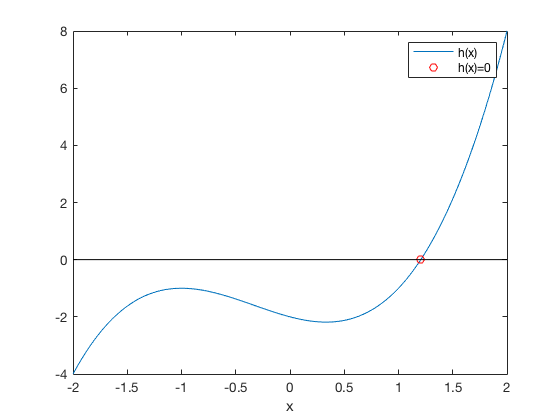

In [29]:
x = linspace(-2, 2, 100);
plot(x, g(x))
hold on
plot(x0, 0., 'or')
plot(x, 0.*x, '-k')
legend('h(x)', 'h(x)=0')
xlabel('x')